I used the BBC transcript to analyse. My purpose is that exploring the 2017 General Election, and discovering the hot news topics in April, May, June 2017.

①. What is the general type of the data? 

Online json

②. How large and complex is it? 

I have analysed the words data in April, May, June 2017. There are more than 4.5 million original words data. The complex part is that how I can get the online raw json data efficiently. Finally, I wrote a web spider to grab the raw data.

③. What fields and data types are present?

string: wordId
Fload: wordStartTime
Fload: wordEndtTime
Fload: wordConfidence
String: date

④. Links between this data and other data?

Foreign keys

⑤. Summary statistics about the data?

I obtained the raw data from online json. There are more than 4.5 million rows in total. I used two kinds of stop words package to filtrate the ineffective words data, and then using the natural language processing function "nltk" to choose nounal words. Finally, I got around 100 thousand effective words to analyse. I counted and ranked the hot news words for each month.

⑥. How does the data relate to the questions that the data owner has discussed with you?

On this stage, It is the basic natural language processing and analyses. In the next stage, based on this analyse it will solve the semantic analyses problem.

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import ijson       #Installing ijson from this websit: https://pypi.python.org/pypi/ijson#downloads
import itertools
import requests
import bs4
import nltk      #Installing nltk from this websit:http://www.nltk.org/install.html

In [2]:
#Web spider
root_url = "http://data.cstr.ed.ac.uk/globalvox/asr/2017/"
index_url = root_url + '?C=N;O=D'
def getUrls():
    response = requests.get(index_url)
    soup = bs4.BeautifulSoup(response.text, "lxml")
    #return [a.attrs.get('href') for a in soup.select('[href^=201706]')]
    return [a.attrs.get('href') for a in soup.select('[href^=2017]')]

urls = []
for item in getUrls():
    urls.append(root_url + item)
urls

['http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170627_060900_best_of_today.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_231400_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_222100_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_210000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_173000_six_oclock_news.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_152800_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_151000_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_140000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_133100_best_of_today.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_124500_world_at_one.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_122200_best_of_today.asr.json',
 'http://data

In [3]:
Apr_week1 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170409_230100_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170401_023000_the_world_this_week.asr.json")+1]

Apr_week2 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170416_231800_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170410_092100_best_of_today.asr.json")+1]
     
Apr_week3 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170423_223900_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170417_013000_hardtalk.asr.json")+1]
     
Apr_week4 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170430_222100_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170424_004200_world_business_report.asr.json")+1]

May_week1 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170507_231000_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170501_054100_best_of_today.asr.json")+1]

May_week2 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170514_230100_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170508_055000_best_of_today.asr.json")+1]

May_week3 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170521_230300_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170515_003800_world_business_report.asr.json")+1]

May_week4 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170531_225000_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170522_004500_world_business_report.asr.json")+1]

Jun_week1 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170604_230200_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170601_013000_the_inquiry.asr.json")+1]

Jun_week2 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170611_230300_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170605_055700_best_of_today.asr.json")+1]

Jun_week3 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170618_230900_global_news_podcast.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170612_054400_best_of_today.asr.json")+1]

Jun_week4 = urls[urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170627_060900_best_of_today.asr.json"):
            urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170619_004300_world_business_report.asr.json")+1]

     

In [4]:
urls = Apr_week1
a = []
for item in urls:     #April_week1
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")    #Dismantling json
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]    #Dismantling json
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
spokenWords_Apr_week1 = list(itertools.chain.from_iterable(a))

urls = Apr_week2
a = []
for item in urls:     #April_week2
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
spokenWords_Apr_week2 = list(itertools.chain.from_iterable(a))

urls = Apr_week3   #April_week3
a = []
for item in urls:     
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
spokenWords_Apr_week3 = list(itertools.chain.from_iterable(a))

urls = Apr_week4   #April_week4
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_Apr_week4 = list(itertools.chain.from_iterable(a))

In [5]:
urls = May_week1   
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_May_week1 = list(itertools.chain.from_iterable(a))

urls = May_week2   
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_May_week2 = list(itertools.chain.from_iterable(a))

urls = May_week3   
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_May_week3 = list(itertools.chain.from_iterable(a))

urls = May_week4
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_May_week4 = list(itertools.chain.from_iterable(a))

In [6]:
urls = Jun_week1
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_Jun_week1 = list(itertools.chain.from_iterable(a))

urls = Jun_week2
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_Jun_week2 = list(itertools.chain.from_iterable(a))

urls = Jun_week3
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")      #
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_Jun_week3 = list(itertools.chain.from_iterable(a))

urls = Jun_week4
a = []
for item in urls:
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)  
spokenWords_Jun_week4 = list(itertools.chain.from_iterable(a))

In [7]:
spokenWords = spokenWords_Apr_week1

cols = list(spokenWords[0].keys())       #integrating the data become DataFrame
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df = pd.DataFrame(rows, index = indices, columns = cols)

df_Apr_week1 = df.convert_objects(convert_numeric=True)
df_Apr_week1

/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,wordEnd,wordId,wordStart,wordConfidence
0,7.81,THIS,7.58,1.00
1,7.94,IS,7.81,1.00
2,8.03,THE,7.94,1.00
3,8.72,B.B.C.,8.03,0.99
4,9.31,FOR,9.17,0.98
5,9.80,DETAILS,9.31,1.00
6,9.88,OF,9.80,0.97
7,10.00,A,9.88,0.86
8,10.50,COMPLETE,10.00,1.00
9,10.77,RANGE,10.50,1.00


In [8]:
spokenWords = spokenWords_Apr_week2
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Apr_week2 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_Apr_week3
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Apr_week3 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_Apr_week4
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df = pd.DataFrame(rows, index = indices, columns = cols)
df_Apr_week4 = df.convert_objects(convert_numeric=True)

/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [9]:
spokenWords = spokenWords_May_week1
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_May_week1 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_May_week2
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_May_week2 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_May_week3
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_May_week3 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_May_week4
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_May_week4 = df.convert_objects(convert_numeric=True)

/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [10]:
spokenWords = spokenWords_Jun_week1
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Jun_week1 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_Jun_week2
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Jun_week2 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_Jun_week3
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Jun_week3 = df.convert_objects(convert_numeric=True)

spokenWords = spokenWords_Jun_week4
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)
df = pd.DataFrame(rows, index = indices, columns = cols)
df_Jun_week4 = df.convert_objects(convert_numeric=True)

/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [67]:
#Removing extra symbols

strWordId = df_Apr_week1
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Apr_week1 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")


strWordId = df_Apr_week2
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Apr_week2 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_Apr_week3
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Apr_week3 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_Apr_week4
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Apr_week4 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

In [68]:
strWordId = df_May_week1
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_May_week1 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_May_week2
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_May_week2 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_May_week3
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_May_week3 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_May_week4
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_May_week4 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

In [69]:
strWordId = df_Jun_week1
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Jun_week1 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_Jun_week2
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Jun_week2 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_Jun_week3
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Jun_week3 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

strWordId = df_Jun_week4
strWordId = str(list(strWordId.wordId))
strWordId = strWordId.replace('"', "'")
strWordId = strWordId.replace("'", "")
strWordId = strWordId.replace("[", "")
strWordId = strWordId.replace("]", "")
strWordId = strWordId.replace(",", "")
strWordId = strWordId.replace("CONSERVATIVES ", "CONSERVATIVE ")
strWordId = strWordId.replace("ATTACKER ", "ATTACK ")
strWordId = strWordId.replace("TERRORISTS ", "TERRORIST ")
strWordId_Jun_week4 = strWordId.replace("INVESTMENTS ", "INVESTMENT ")

In [70]:
#add and integrate stopwords
from nltk.corpus import stopwords
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words = str(stop_words)

stop_words = stop_words.replace('"', "'")
stop_words = stop_words.replace(" '", "'")
stop_words = stop_words.replace("'", "")
stop_words = stop_words.replace("[", "")
stop_words = stop_words.replace("]", "")

stop_words = stop_words.split(',',-1)
myAddstopwords = ["people", "time", "years", "year", "way", "today", "country", "news", "things", "something", "part", "lot", "day", "course", "kind", "point", "b.b.c", "government", "world", "president"]
stopwords = stopwords.words('english') + stop_words + myAddstopwords


In [71]:
#natural language processing function to get noun

strWordId = strWordId_Apr_week1
sentences=nltk.sent_tokenize(strWordId)
words=[word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)] #单词化
words=[word for word in words if word not in stopwords] #去除停用词
word_tag_Apr_week1=[var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']] #词性标注并选择出名词和动词

strWordId = strWordId_Apr_week2
sentences = nltk.sent_tokenize(strWordId)
words=[word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words=[word for word in words if word not in stopwords]
word_tag_Apr_week2=[var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_Apr_week3
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Apr_week3 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_Apr_week4
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Apr_week4 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

In [72]:
strWordId = strWordId_May_week1
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_May_week1 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_May_week2
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_May_week2 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_May_week3
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_May_week3 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_May_week4
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_May_week4 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

In [73]:
strWordId = strWordId_Jun_week1
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Jun_week1 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_Jun_week2
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Jun_week2 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_Jun_week3
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Jun_week3 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

strWordId = strWordId_Jun_week4
sentences = nltk.sent_tokenize(strWordId)
words = [word.lower() for sentence in sentences for word in nltk.word_tokenize(sentence)]
words = [word for word in words if word not in stopwords]
word_tag_Jun_week4 = [var[0] for var in nltk.pos_tag(words) if var[1][0] in ['N']]

In [74]:
import collections

data = word_tag_Apr_week1
data = collections.Counter(data).most_common()        #Word repetition frequency
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-04 week1"
data_Apr_week1 = data.sort_values(by = 'repeat',ascending = False)  
data_Apr_week1

,words,repeat,date
0,attack,439,2017-04 week1
1,weapons,371,2017-04 week1
2,trump,318,2017-04 week1
3,police,286,2017-04 week1
4,state,266,2017-04 week1
5,war,257,2017-04 week1
6,service,256,2017-04 week1
7,syria,254,2017-04 week1
8,security,254,2017-04 week1
9,business,251,2017-04 week1


In [75]:
data = word_tag_Apr_week2
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-04 week2"
data_Apr_week2 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_Apr_week3
data = collections.Counter(data).most_common()        
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-04 week3"
data_Apr_week3 = data.sort_values(by = 'repeat',ascending = False)   

data = word_tag_Apr_week4
data = collections.Counter(data).most_common()        
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-04 week4"
data_Apr_week4 = data.sort_values(by = 'repeat',ascending = False)    

In [76]:
data = word_tag_May_week1
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-05 week1"
data_May_week1 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_May_week2
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-05 week2"
data_May_week2 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_May_week3
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-05 week3"
data_May_week3 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_May_week4
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-05 week4"
data_May_week4 = data.sort_values(by = 'repeat',ascending = False)

In [77]:
data = word_tag_Jun_week1
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-06 week1"
data_Jun_week1 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_Jun_week2
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-06 week2"
data_Jun_week2 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_Jun_week3
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-06 week3"
data_Jun_week3 = data.sort_values(by = 'repeat',ascending = False)

data = word_tag_Jun_week4
data = collections.Counter(data).most_common()       
data = pd.DataFrame(data)
data.columns=["words", "repeat"]
data["date"] = "2017-06 week4"
data_Jun_week4 = data.sort_values(by = 'repeat',ascending = False)

In [78]:
dataSelect = data_Apr_week1
dataSelect_Apr_week1 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Apr_week2
dataSelect_Apr_week2 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Apr_week3
dataSelect_Apr_week3 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Apr_week4
dataSelect_Apr_week4 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]



In [79]:
dataSelect = data_May_week1
dataSelect_May_week1 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_May_week2
dataSelect_May_week2 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_May_week3
dataSelect_May_week3 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_May_week4
dataSelect_May_week4 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]


In [80]:
dataSelect = data_Jun_week1
dataSelect_Jun_week1 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Jun_week2
dataSelect_Jun_week2 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Jun_week3
dataSelect_Jun_week3 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]

dataSelect = data_Jun_week4
dataSelect_Jun_week4 = dataSelect [(dataSelect["words"] == "trump")|(dataSelect["words"] == "conservative")|(dataSelect["words"] == "theresa")
                                   |(dataSelect["words"] == "attack")|(dataSelect["words"] == "labour")|(dataSelect["words"] == "jeremy")
                                   |(dataSelect["words"] == "timothy")|(dataSelect["words"] == "democrats")]


In [81]:
a = word_tag_Apr_week1
b = word_tag_Apr_week2
c = word_tag_Apr_week3
d = word_tag_Apr_week4

e = np.array(a + b + c + d)
month_data = pd.DataFrame(e)
month_data.columns=["April_words"]
month_data = pd.DataFrame({'repeat' : month_data.groupby( ["April_words"] ).size()}).reset_index()
april_data = month_data.sort_values(by = 'repeat',ascending = False)
april_data

,April_words,repeat
5812,election,1437
12687,party,1035
16584,state,1020
18190,twenty,889
1038,attack,867
11337,minister,847
18080,trump,792
13240,police,790
2494,business,785
11493,money,774


In [82]:
a = word_tag_May_week1
b = word_tag_May_week2
c = word_tag_May_week3
d = word_tag_May_week4

e = np.array(a + b + c + d)
month_data = pd.DataFrame(e)
month_data.columns=["May_words"]
month_data = pd.DataFrame({'repeat' : month_data.groupby( ["May_words"] ).size()}).reset_index()
may_data = month_data.sort_values(by = 'repeat',ascending = False)
may_data

,May_words,repeat
5966,election,1534
13015,party,1130
18444,trump,998
13601,police,941
18545,twenty,925
17940,thing,918
11796,money,893
19485,work,886
15998,service,862
15873,security,844


In [83]:
a = word_tag_Jun_week1
b = word_tag_Jun_week2
c = word_tag_Jun_week3
d = word_tag_Jun_week4

e = np.array(a + b + c + d)
month_data = pd.DataFrame(e)
month_data.columns=["June_words"]
month_data = pd.DataFrame({'repeat' : month_data.groupby( ["June_words"] ).size()}).reset_index() 
june_data = month_data.sort_values(by = 'repeat',ascending = False)
june_data

,June_words,repeat
11448,party,1292
5255,election,1231
10226,minister,1091
6086,fire,975
11978,police,848
17285,work,816
15882,thing,794
2208,business,749
10926,number,742
4217,deal,730


In [84]:
a = np.array(dataSelect_Apr_week1)
b = np.array(dataSelect_Apr_week2)
c = np.array(dataSelect_Apr_week3)
d = np.array(dataSelect_Apr_week4)
e = np.array(dataSelect_May_week1)
f = np.array(dataSelect_May_week2)
g = np.array(dataSelect_May_week3)
h = np.array(dataSelect_May_week4)
i = np.array(dataSelect_Jun_week1)
j = np.array(dataSelect_Jun_week2)
k = np.array(dataSelect_Jun_week3)
l = np.array(dataSelect_Jun_week4)
m = np.vstack((a, b, c, d, e, f, g, h, i, j, k, l))
words_data = pd.DataFrame(m)
words_data.columns=["words", "repeat","date"]
words_data = words_data.pivot(index="date", columns="words", values="repeat")
words_data

words,attack,democrats,jeremy,labour,theresa,timothy,trump
date,,,,,,,
2017-04 week1,439,13,33,25,36,None,318
2017-04 week2,198,2,15,10,6,None,160
2017-04 week3,143,61,112,99,176,None,82
2017-04 week4,87,32,57,48,67,None,232
2017-05 week1,48,58,55,70,93,None,71
2017-05 week2,72,91,81,96,76,None,237
2017-05 week3,49,46,68,76,61,3,342
2017-05 week4,436,14,141,67,142,None,348
2017-06 week1,137,42,65,64,90,1,159


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

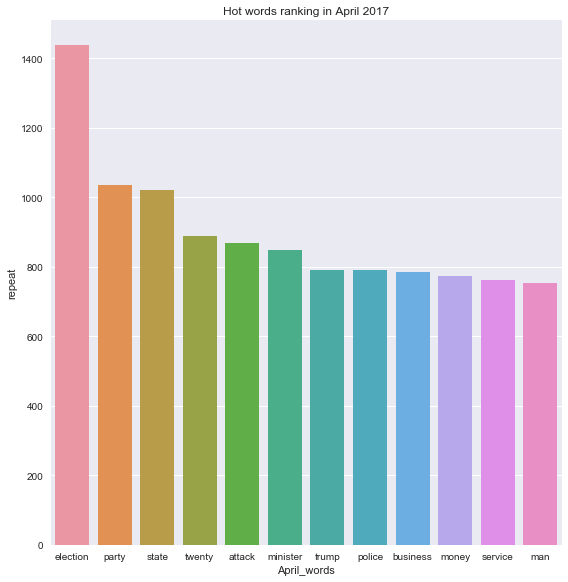

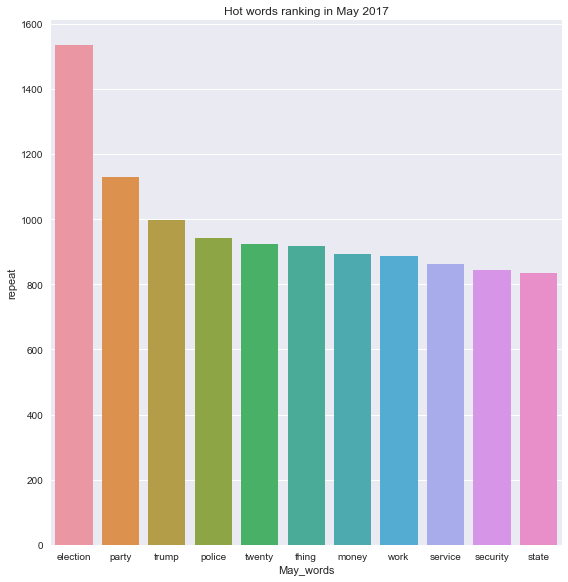

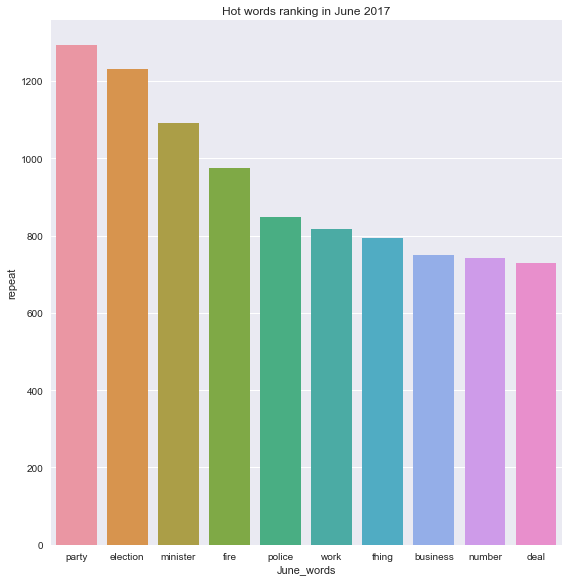

In [86]:
dataSelect = april_data
dataSelect = dataSelect [dataSelect["repeat"] > 750]        
sns.factorplot(data=dataSelect, x="April_words", y="repeat", kind="bar", size=8)
plt.title('Hot words ranking in April 2017')

dataSelect = may_data
dataSelect = dataSelect [dataSelect["repeat"] > 800]        
sns.factorplot(data=dataSelect, x="May_words", y="repeat", kind="bar", size=8)
plt.title('Hot words ranking in May 2017')

dataSelect = june_data
dataSelect = dataSelect [dataSelect["repeat"] > 700]        
sns.factorplot(data=dataSelect, x="June_words", y="repeat", kind="bar", size=8)
plt.title('Hot words ranking in June 2017')


According to the hot words in 3 months. We can see the general election event during this period. It is because, in April, May, June, the high-frequent news words are election, party. But there are also some high-frequent negative news words, such as attack, fire, police. So, I think the world is not very stable during this period.

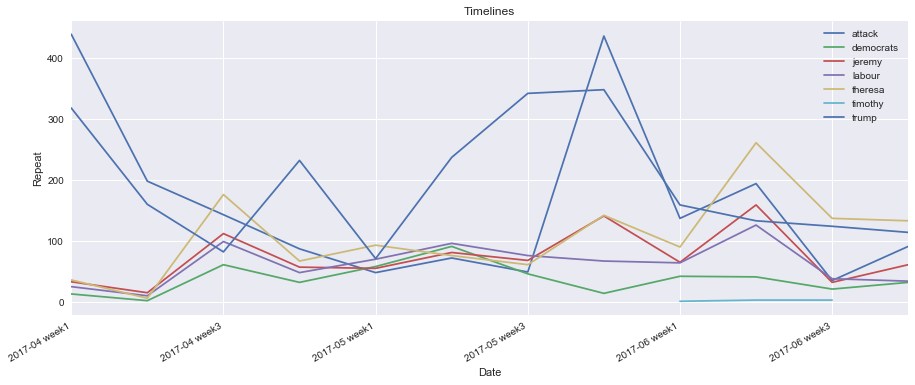

In [87]:
dfp = words_data

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

dfp.plot(ax=ax)

ax.set(xlabel='Date', ylabel='Repeat', title='Timelines')

ax.legend(loc=1)
fig.autofmt_xdate()

Looking at this figure, I find the rate of media exposure in presidential candidates can predict the future president. Before the 8th June, the three presidential candidates had the different rate of media exposure. In general, the Theresa media exposure rate was higher than other two candidates. However, it seems that the candidate's success has nothing to do with the media exposure of their political party. Through this line chart, we can find the Theresa's Conservative Party did not get lots of media exposure. In contrast, the Jeremy's Labour Party had a range of media exposure, even the rate was higher than the Jeremy. But he still lost.

Interestingly, during the period of UK general election, the America president Trump's media exposure rate was much higher than British future president. Probably, Trump made some global news at that time.

There is an important data we must pay more attention. The news about "attack", it increased sharply between the period of the third week in May 2017 and the first week in June 2017. This time was the key period in UK general election. So we need to increase the self-protection awareness in this kind of sensitive period.
